In [50]:
#Imports
import numpy as np
import pandas as pd
import tulipy as ti
import requests
import math
import time
from scipy import stats
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from decouple import config

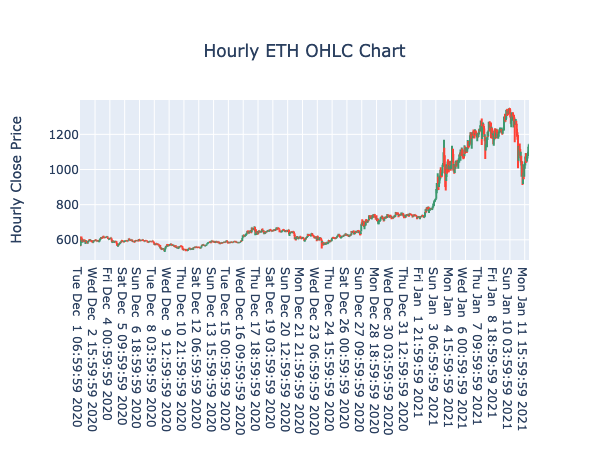

In [103]:
BINANCE_API_KEY = config('BINANCE_API_KEY')
BINANCE_SECRET_KEY = config('BINANCE_SECRET_KEY')
api_url = f'https://api.binance.us/api/v3/klines?symbol=ETHUSD&interval=1h&limit=1000'

data = requests.get(api_url).json()
dates = []

for i in range(len(data)):
    dates.append(str(time.ctime(data[i][6] / 1000)))
    data[i].pop()

ETH_DF = pd.DataFrame(data, columns=['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote asset volume', '# of trades', 'taker base asset volume', 'taker quote asset volume'])
ETH_DF['date'] = dates

fig = go.Figure(data=go.Ohlc(x=ETH_DF['date'],
                    open=ETH_DF['open'],
                    high=ETH_DF['high'],
                    low=ETH_DF['low'],
                    close=ETH_DF['close']))

fig.update_layout(title_text='Hourly ETH OHLC Chart',
                  title={
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                  xaxis_rangeslider_visible=False, yaxis_title="Hourly Close Price")


fig.show()